In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Genauigkeit der AD-Wandlung

In [6]:
def read_csv_file(filename, skiprows=1):
    data = pd.read_csv(
        filename,
        delimiter=";",
        skiprows=skiprows,
        decimal=",",
        names=["volt", "fein", "analog", "pico", "ad"],
    )

    return data

read_csv_file("Messung-1.csv")

,volt,fein,analog,pico,ad
0,1,1.004,1.013,1.020,1.005859
1,2,2.066,2.050,2.055,2.060547
2,3,3.073,3.050,3.077,3.066406
3,4,4.078,4.040,4.058,4.072266
4,5,5.085,5.030,5.050,5.078125
5,6,5.996,5.940,5.980,5.986328
6,7,7.003,6.935,6.997,7.000000
7,8,8.059,7.980,8.036,8.056641
8,9,9.066,8.980,9.055,9.052734
9,10,10.074,9.980,10.090,9.990234


In [7]:
def measure_error(data, ref):
    error = (ref - data) ** 2
    return error

data = read_csv_file("Messung-1.csv")
measure_error(data["ad"], data["fein"])

0    0.000003
1    0.000030
2    0.000043
3    0.000033
4    0.000047
5    0.000094
6    0.000009
7    0.000006
8    0.000176
9    0.007017
dtype: float64

In [8]:
def std_deviation(data, ref):
    squared_error = measure_error(data, ref)
    std_dev = np.sqrt(np.sum(squared_error) / (len(data) - 1))
    return std_dev

std_deviation(data["ad"], data["fein"])

np.float64(0.0287857770108142)

In [9]:
def theoretical_quant_error(umin, umax, n_bits):
    return (umax - umin) / (2 ** n_bits)

In [11]:
data = read_csv_file("Messung-1.csv")
print(f"Theoretical Quantization Error: {theoretical_quant_error(data["volt"][0], data["volt"][len(data) - 1], 11)}")
print(f"Standard Deviation: {std_deviation(data["ad"], data["fein"])}")

Theoretical Quantization Error: 0.00439453125
Standard Deviation: 0.0287857770108142


## Genauigkeit der DA-Wandlung

In [15]:
new_data = read_csv_file("Messung-2.csv")
print(f"Theoretical Quantization Error: {theoretical_quant_error(new_data["volt"][0], new_data["volt"][len(new_data) - 1], 10)}")
print(f"Standard Deviation: {std_deviation(new_data["analog"], new_data["fein"])}")

Theoretical Quantization Error: 0.00439453125
Standard Deviation: 0.02885788935070916


## Abtasttheorem

In [24]:
def read_signal_file(filename):
    data = pd.read_csv(
        filename,
        delimiter=",",
        skiprows=3,
        names=["time", "amplitude"],
        dtype={"time": int, "amplitude": int}
    )

    return data

read_signal_file("signal_1750Hz.csv")

,time,amplitude
0,0,2902
1,1,2644
2,2,1172
3,3,1446
4,4,2920
...,...,...
995,995,2454
996,996,1068
997,997,1636
998,998,3022


In [32]:
def plot_signal(signals):
    for freq, data in signals.items():
        plt.figure(figsize=(12, 6))
        plt.plot(data["time"], data["amplitude"], label=f"{freq} Signal", color="orange")
        plt.title(f"Signal at {freq}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid()
        plt.show()

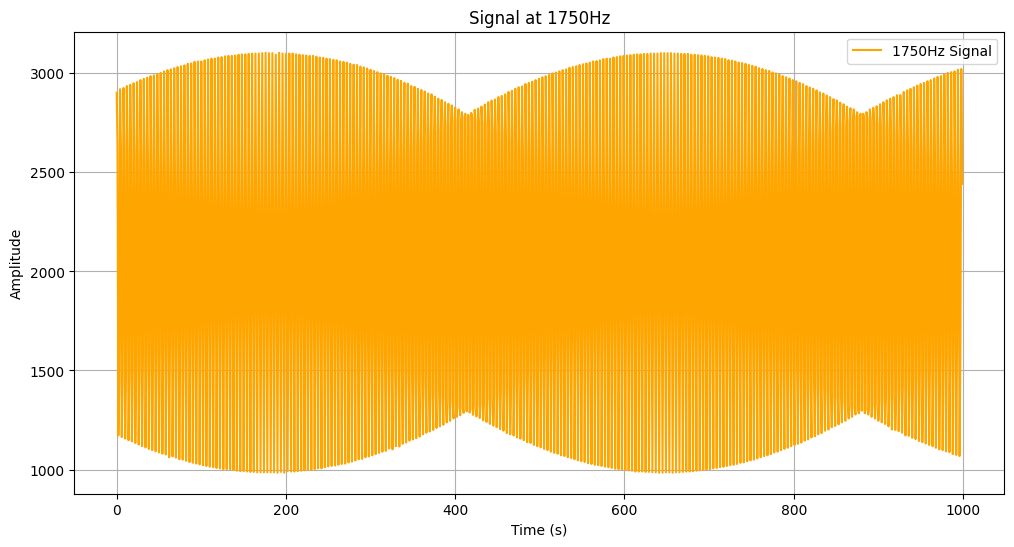

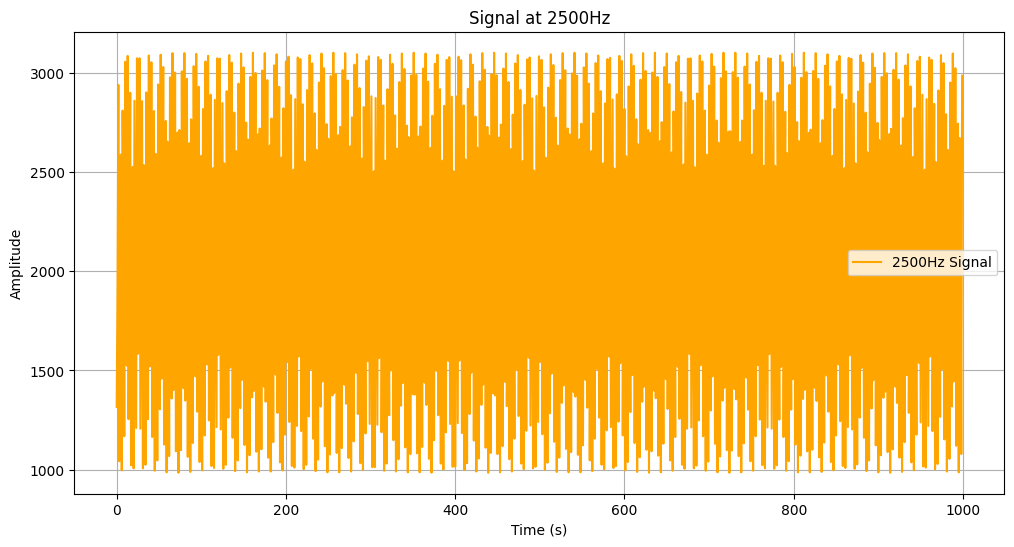

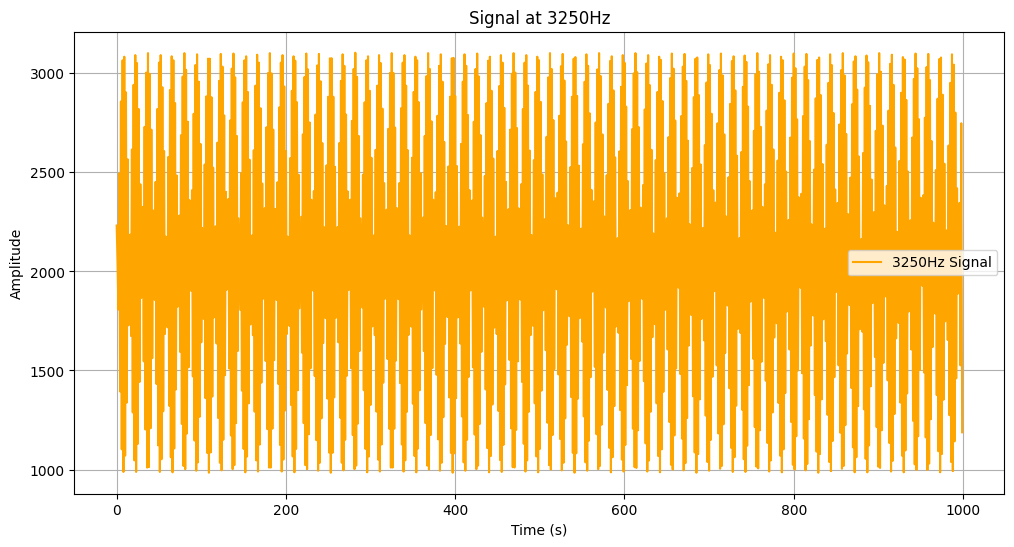

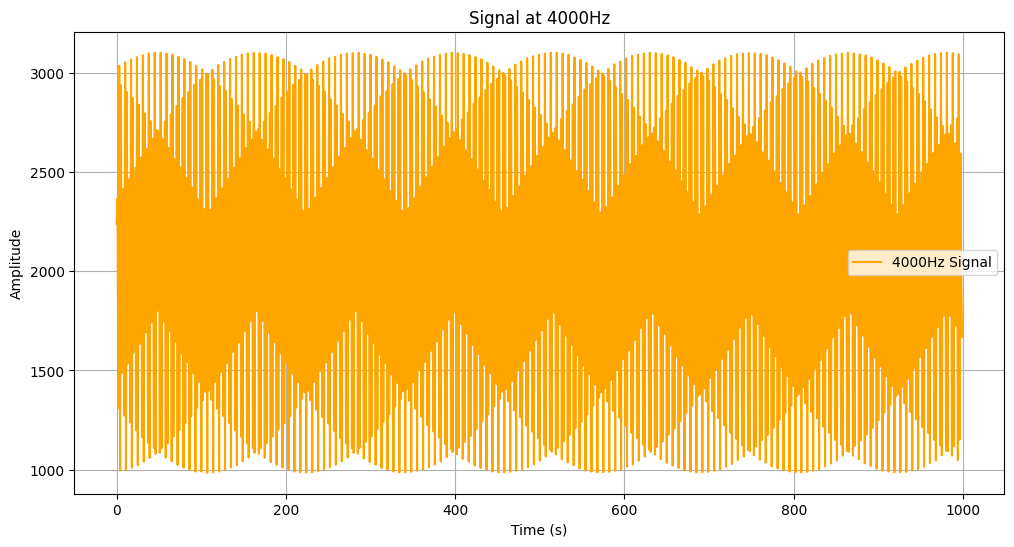

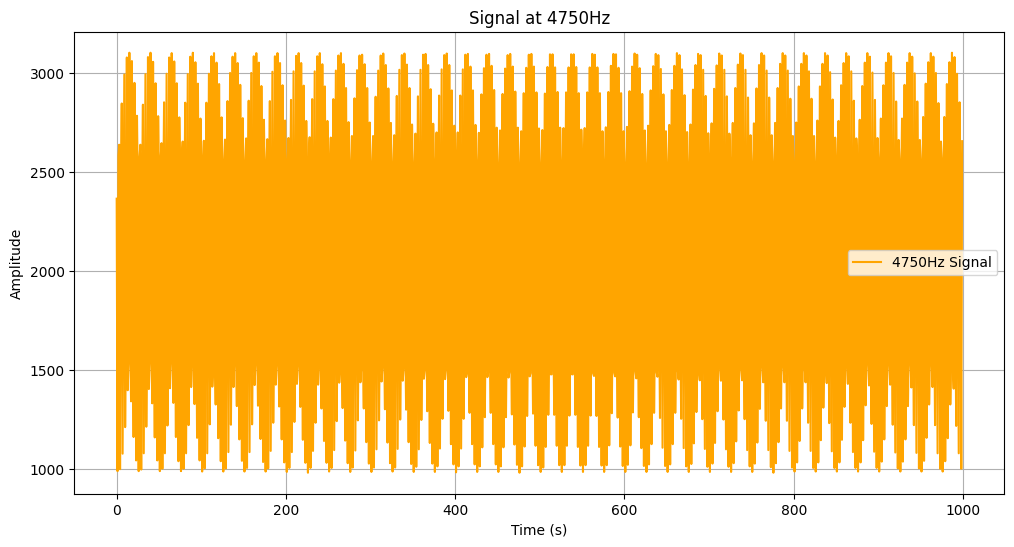

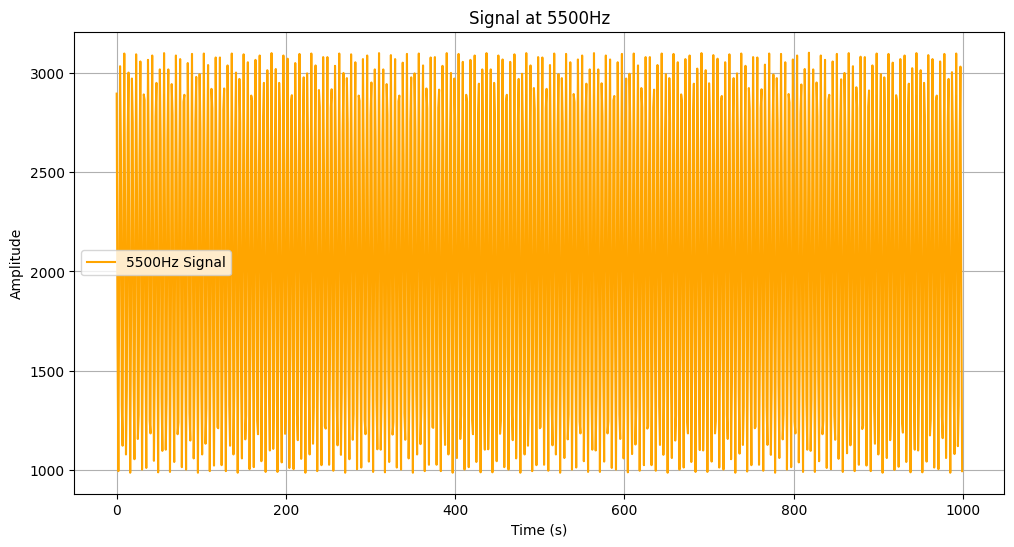

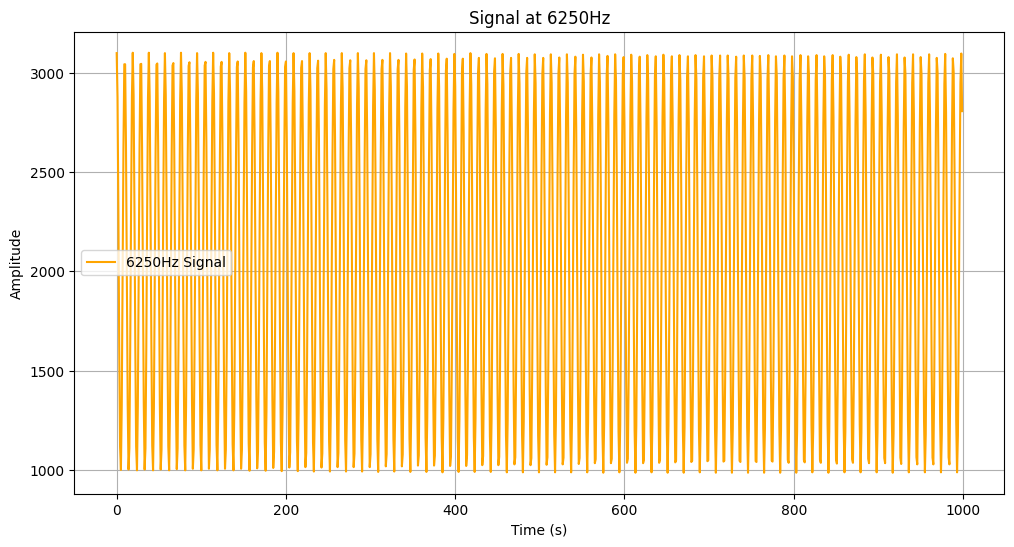

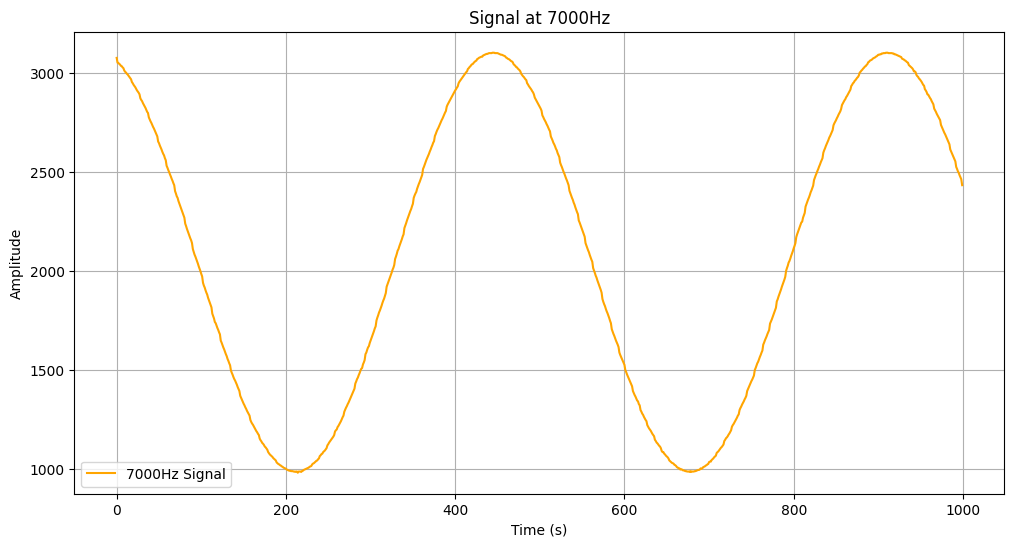

In [33]:
files = {f"{freq}Hz": f"signal_{freq}Hz.csv" for freq in [1750, 2500, 3250, 4000, 4750, 5500, 6250, 7000]}
signals = {freq: read_signal_file(file) for freq, file in files.items()}

plot_signal(signals)